# Scales

In [1]:
from scipy.stats import logistic
import numpy as np
import matplotlib, matplotlib.pyplot as plt

In [2]:
# 원하는 플로팅 스타일을 선택한다.
matplotlib.style.use("ggplot")

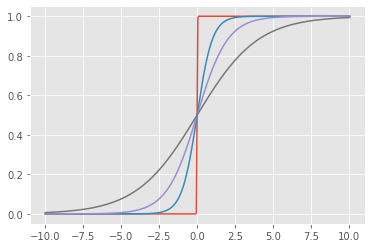

In [3]:
# 일부 다른 로직 곡선을 보여준다.
x = np.arange(-10, 10.1, 0.05)
scales = (0.01, 0.5, 1, 2)
for scale in scales:
    plt.plot(x, logistic.cdf(x, 0, scale))

In [4]:
# 플롯을 저장한다.
plt.savefig("logit.pdf")

<Figure size 432x288 with 0 Axes>

# Logit result (confusion matrix)

In [21]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import sklearn.linear_model as lm

In [22]:
# 회귀 도구를 생성한다.
clf = lm.LogisticRegression(max_iter=1000)
#clf = lm.LogisticRegression(C=10.0, max_iter=1000)

In [23]:
# 데이터시트를 읽어들이고, 등급을 정량화한다.
grades = pd.read_table("grades.csv")
labels = ('F', 'D', 'C', 'B', 'A')
grades["Letter"] = pd.cut(grades["Final score"], [0, 60, 70, 80, 90, 100],
                          labels=labels)
X = grades[["Quiz 1", "Quiz 2"]]

In [24]:
# 모델을 학습시키고, score와 혼동 행렬을 출력한다.
clf.fit(X, grades["Letter"])
print("Score=%.3f" % clf.score(X, grades["Letter"]))
cm = confusion_matrix(clf.predict(X), grades["Letter"])
print(pd.DataFrame(cm, columns=labels, index=labels))

Score=0.605
   F   D  C  B  A
F  0   0  0  0  0
D  2  16  4  3  1
C  0   1  7  2  1
B  0   0  1  1  1
A  0   0  0  1  2
